# Credit Risk Modeling | Part 2: PD Model w ML, Performances, Scorecard, Credit Score and Cutoffs

<img src='https://salaamedia.com/wp-content/uploads/2022/07/Credit-Score.jpg'>  

**Probability of default, PD**

*  Logistic regression with the use of scikit learn library

*  Probability of default means the likelihood that a borrower will default on debt (credit card, mortgage or non-mortgage loan) over a one-year period.In simple words, it returns the expected probability of customers fail to repay the loan. 

*  Probability is expressed in the form of percentage, lies between 0% and 100%. Higher the probability, higher the chance of default.


**Scorecard**



A scorecard needs to be easily interpretable by a layperson. It is a requirement imposed by the Basel Accord, almost all central banks, and various lending entities. Given the high monetary and non-monetary misclassification costs, it is achieved by a scorecard that use discretized variables even for any continuous variables. Therefore, differences between low and high scores can be easily explained to third parties.

Our scorecard should have the minimum and maximum scores that are standardized. As a starting point, the score range of FICO is used from 300 to 850.

Score cards have advantage of making the pd model coefficients more readable. So, let's convert pd model to score card

**Loan Approval Cut-offs**

What should be the loan cut-off point to decide whether to accept or reject loans? 

=> Borrowers with a credit score higher than the set cut-off point will be accepted for loans and those less than the cutoff point will be rejected? It serves as a fine balance between the expected loan approval and rejection rates.

# 1 Data Preparation

## a Importing Libraries

In [1]:
#installing gdown package to download dataset stored in G Drive
!pip install gdown
# to upgrade
!pip install --upgrade gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#libs for managing data
import numpy as np
import pandas as pd

#libs for ML regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics  
from sklearn.metrics import roc_curve, roc_auc_score

#libs for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#exporting ML model
import pickle

#lib to download dataset on g drive
import gdown

#setting display option max rows
#pd.options.display.max_rows = None

#importing custom-made functions
import sys #importing local functions in src folder
sys.path.append('../src/')
from functions import *

## b Importing Preprocessed Test and Train Dataset 

Please note that if you have already run the first notebook, you don't need to run the codes below and so download the data sets. 

In [4]:
#test and train datasets were preprocessed in the first notebook.
#they were than stocked over G-drive for the easiness. 
#the links below download those 4 files from G-Drive
#Train dataset
# 1st file 
url = "https://drive.google.com/file/d/1v45P0HhUxZ1x4HmD0bWblpUyUWuiC0_5/view?usp=share_link"
output = "loan_data_inputs_train.csv"
g_down (url,'../data/'+output)

# 2nd file
url = "https://drive.google.com/file/d/1KvP7EXfVNdekotGFqgp9UUlNXBLCKy9i/view?usp=share_link"
output = "loan_data_targets_train.csv"
g_down (url,'../data/'+output)

Downloading...
From: https://drive.google.com/uc?id=1v45P0HhUxZ1x4HmD0bWblpUyUWuiC0_5
To: /data/loan_data_inputs_train.csv
100%|██████████| 436M/436M [00:03<00:00, 111MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1KvP7EXfVNdekotGFqgp9UUlNXBLCKy9i
To: /data/loan_data_targets_train.csv
100%|██████████| 3.27M/3.27M [00:00<00:00, 82.4MB/s]


In [5]:
# Test dataset
# 3rd file
url = "https://drive.google.com/file/d/1M-VHZM612ihx-elO6dw3SVYJh0cWD5E6/view?usp=share_link"
output = "loan_data_inputs_test.csv"
g_down (url,'../data/' + output)

# 4th file
url = "https://drive.google.com/file/d/1wTkfTDyCxcMcddsz-Fk-AO_Y6owLhzWp/view?usp=share_link"
output = "loan_data_targets_test.csv"
g_down (url,'../data/' + output)


Downloading...
From: https://drive.google.com/uc?id=1M-VHZM612ihx-elO6dw3SVYJh0cWD5E6
To: /data/loan_data_inputs_test.csv
100%|██████████| 109M/109M [00:02<00:00, 54.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wTkfTDyCxcMcddsz-Fk-AO_Y6owLhzWp
To: /data/loan_data_targets_test.csv
100%|██████████| 817k/817k [00:00<00:00, 31.9MB/s]


In [6]:
#loading csv files as pd dataframes
inputs_train = pd.read_csv ('../data/'+'loan_data_inputs_train.csv',index_col =0)
targets_train = pd.read_csv ('../data/'+'loan_data_targets_train.csv',index_col =0)
inputs_test = pd.read_csv ('../data/'+'loan_data_inputs_test.csv',index_col =0)
targets_test = pd.read_csv ('../data/'+'loan_data_targets_test.csv',index_col =0)

## c Exploring Data

In [7]:
targets_train.value_counts()

good_bad
1           332863
0            40165
dtype: int64

In [8]:
inputs_train.shape

(373028, 315)

In [9]:
inputs_train.columns.values

array(['Unnamed: 0.1', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       've

In [10]:
targets_test.value_counts()

good_bad
1           83215
0           10042
dtype: int64

In [11]:
inputs_test.shape

(93257, 315)

In [12]:
inputs_test.columns.values

array(['Unnamed: 0.1', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       've

## d Avoiding dummy variable trap

For each feature, dummy variables were created in data table. For example, for grades, we have 7 columns for Grades from Grade:A to Grade:G. Each column consists of values 1 or 0.  

eg. for Grades=A, we use 0 Non and 1 True (Grade A)  
We only need 7 - 1 columns in our prediction model. 

In this case, the reference category is Grade:D (see the first notebook).

**We have to remove one dummy column for each original variable, to avoid falling into the dummy variable trap**

In [13]:
# Here we select a limited set of input variables                                           
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
]

In [14]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [15]:
#loading values of df in a new dataframe.   
inputs_train_ref_categories = inputs_train.loc[: ,features_all]
# we drop the variables with reference categories.
inputs_train_ref_categories = inputs_train_ref_categories.drop(ref_categories, axis = 1)
 
inputs_train_ref_categories.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


# 2 Prediction of Default (PD) Model Fit with P-Values

Logistic regression is considered for the PD model due to the Basel accord.

Building a logistic regression model with P-Values


**What is a p-value? How to use it to verify the relationship between variables**

"The p-value is, assuming that the null hypothesis is correct, the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test."  

*The null hypothesis states that there is no relationship between the two variables being studied (one variable does not affect the other)*

* When a relationship between two variables is set, there is always a possibility that this correlation might be a coincidence. 
* Checking p-value helps determine if the observed relationship is due to the result of chance or not.
* A p-value is a statistical measurement used whether to validate or not a hypothesis against observed data.  
* We use the p-value as an alternative to reject points to provide the smallest level of significance at which the null hypothesis would be rejected.  
* A smaller p-value means that there is stronger evidence in favor of the alternative hypothesis. It means there is greater statistical significance of the observed difference.
* A p-value of 0.05 or lower is generally considered statistically significant.

Here is the strategy to evaluate the features:

review p-values of all categories. if most of the dummy categories of a feature fall above a p-value of 0.05, eliminate them! p< 0.05

## a Model fit with p-values

In [17]:
# Creating an instance from 'LogisticRegression_with_p_values()' class.
reg = LogisticRegression_with_p_values()


In [18]:
# Fitting and obtaining coefs 
reg.fit(inputs_train_ref_categories, targets_train)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# creating a summary table
feature_name = inputs_train_ref_categories.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
# We take the result of the newly added method 'p_values'
p_values = reg.p_values
# Adding the intercept for completeness. We add the value 'NaN' in the beginning of the variable with p-values.
p_values = np.append(np.nan, np.array(p_values))
# Adding a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table['p_values'] = p_values

summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.695380,NaN
1,grade:A,0.285385,1.324891e-03
2,grade:B,0.373203,4.890199e-10
3,grade:C,0.346506,8.050088e-10
4,grade:D,0.312413,8.932737e-09
...,...,...,...
93,mths_since_last_record:3-20,-0.041599,7.819500e-01
94,mths_since_last_record:21-31,-0.095120,5.013603e-01
95,mths_since_last_record:32-80,0.104531,3.861799e-01
96,mths_since_last_record:81-86,-0.266336,4.568117e-02


Let's review the results  
=> We can see that the following variables do not have much statistical significance:

* mths_since_earliest_cr_line
* delinq_2yrs
* open_acc
* total_acc
* mths_since_last_delinq
* mths_since_last_record

## b Model fit after removing some features based on p-values

In [20]:
# We commented on some features, the coefficients for all or almost all of the dummy variables for which,
# are not statistically significant.
# Refined variables
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
#'mths_since_earliest_cr_line:<140',
#'mths_since_earliest_cr_line:141-164',
#'mths_since_earliest_cr_line:165-247',
#'mths_since_earliest_cr_line:248-270',
#'mths_since_earliest_cr_line:271-352',
#'mths_since_earliest_cr_line:>352',
#'delinq_2yrs:0',
#'delinq_2yrs:1-3',
#'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
#'open_acc:0',
#'open_acc:1-3',
#'open_acc:4-12',
#'open_acc:13-17',
#'open_acc:18-22',
#'open_acc:23-25',
#'open_acc:26-30',
#'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
#'total_acc:<=27',
#'total_acc:28-51',
#'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
#'mths_since_last_delinq:Missing',
#'mths_since_last_delinq:0-3',
#'mths_since_last_delinq:4-30',
#'mths_since_last_delinq:31-56',
#'mths_since_last_delinq:>=57',
#'mths_since_last_record:Missing',
#'mths_since_last_record:0-2',
#'mths_since_last_record:3-20',
#'mths_since_last_record:21-31',
#'mths_since_last_record:32-80',
#'mths_since_last_record:81-86',
#'mths_since_last_record:>=86',
]

In [21]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'int_rate:>20.281',
#'mths_since_earliest_cr_line:<140',
#'delinq_2yrs:>=4',
'inq_last_6mths:>6',
#'open_acc:0',
'pub_rec:0-2',
#'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35'
#'mths_since_last_delinq:0-3',
#'mths_since_last_record:0-2'
]

In [22]:
#loading values of df in a new dataframe.   
inputs_train_ref_categories = inputs_train.loc[: , features_all]

# we drop the variables with reference categories.
inputs_train_ref_categories = inputs_train_ref_categories.drop(ref_categories, axis = 1)
 
inputs_train_ref_categories.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35
427211,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
inputs_train_ref_categories.shape

(373028, 71)

In [24]:
targets_train.shape

(373028, 1)

In [25]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train_ref_categories, targets_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# Same as above.
feature_name = inputs_train_ref_categories.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table
# Here we get the results for our final PD model.

,Feature name,Coefficients,p_values
0,Intercept,1.550161,NaN
1,grade:A,0.166340,6.007744e-02
2,grade:B,0.317997,8.154048e-08
3,grade:C,0.307956,3.429223e-08
4,grade:D,0.291457,6.052307e-08
...,...,...,...
67,dti:10.5-16.1,-0.123651,3.938126e-02
68,dti:16.1-20.3,-0.222730,2.093044e-04
69,dti:20.3-21.7,-0.240993,1.195677e-04
70,dti:21.7-22.4,-0.266433,6.418244e-05


## c Dumping trained PD model

In [27]:
# Here we export our model to a 'sav' file
pickle.dump(reg2, open('../models/'+'pd_model.sav', 'wb'))

## d PD Model Validation on Test Dataset - Out of sample validation (test)



In [28]:
#loading df with features refined.   
inputs_test_ref_categories = inputs_test.loc[: , features_all]

# we drop the variables with reference categories.
inputs_test_ref_categories = inputs_test_ref_categories.drop(ref_categories, axis = 1)
 
inputs_test_ref_categories.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35
362514,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
213591,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
# Calculating the predicted values for test data set
# based on the values of the independent variables
y_hat_test = reg2.model.predict(inputs_test_ref_categories)
# calculating class probabilities for all classes
y_hat_test_proba = reg2.model.predict_proba(inputs_test_ref_categories)

# an array of predicted discrete classess  (0s and 1s).
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [30]:
# first value of every sub-array is the probability for the observation to belong 
# to the first class, i.e. 0,
#the second value is the probability for the observation to belong to the first class, i.e. 1.
y_hat_test_proba

array([[0.10597278, 0.89402722],
       [0.16738496, 0.83261504],
       [0.07800854, 0.92199146],
       ...,
       [0.02506319, 0.97493681],
       [0.04925621, 0.95074379],
       [0.04404101, 0.95595899]])

In [31]:
# We store these probabilities of 1 (good) in a variable.
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

# Array of probabilities of being 1.
y_hat_test_proba

array([0.89402722, 0.83261504, 0.92199146, ..., 0.97493681, 0.95074379,
       0.95595899])

In [32]:
targets_test_temp = targets_test

# Reseting the index of a dataframe.
targets_test_temp.reset_index(drop = True, inplace = True)

In [33]:
# Concatenating two dataframes consists of actual and predicted results
df_actual_predicted_probs = pd.concat([targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

df_actual_predicted_probs.columns = ['targets_test', 'y_hat_test_proba']
df_actual_predicted_probs.shape

(93257, 2)

In [34]:
# Making the index of one dataframe equal to the index of another dataframe.
df_actual_predicted_probs.index = inputs_test.index

df_actual_predicted_probs.head()

,targets_test,y_hat_test_proba
362514,1,0.894027
288564,1,0.832615
213591,1,0.921991
263083,1,0.918172
165001,1,0.966888


# 3 Evaluation of Model Performances

## a Calculation of Accuracy

Accuracy is the fraction of predictions our model predicted correctly.

It should be noted that accuracy alone is not sufficient when we are working with a class-imbalanced data set and where there is a significant difference between the number of positive and negative labels.

In this case, we also define the threshold as 0.9 to say whether or not to accept a loan request.

In [35]:
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
tr = 0.9

df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [36]:
# Creating a cross-table, aka a Confusion Matrix
# Actual values are displayed by rows and the predicted values by columns.
confusion_matrix = pd.crosstab(df_actual_predicted_probs['targets_test'],\
            df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'],\
            colnames = ['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,7177,2865
1,37089,46126


Breakdown of results

| True Negatives  | False Negatives |  
| False Positives | True Positives  |



In [37]:
# Let's divide each value of the table by the total number of observations,
# Getting percentages, or, rates.
confusionm_perc = confusion_matrix/ df_actual_predicted_probs.shape[0]
confusionm_perc           

Predicted,0,1
Actual,,
0,0.076959,0.030722
1,0.397707,0.494612


In [38]:
# Then we calculate the accuracy of the model: sum of the diagonal ratios. on test dataset

TN = confusionm_perc.iloc[0, 0] #true negative
TP = confusionm_perc.iloc[1, 1] #true positive
print('Accuracy on test dataset=', round(TN + TP,4))

Accuracy on test dataset= 0.5716


57% of the time, the model predicted correctly whether or not the borrower will default for a set threshold of 0.9.

It means that the model makes bad estimations 43% of the time. 3% of the time, it fails predicting default (bad) cases.  40% of the time it fails predicting good cases where the borrower did not default. 

In point of view of the bank, the results are overconservative and reduce the risk of money lost due to the borrower being defaulted. 

This may bring the problem of a bank losing customers as the model fails giving credits to some GOOD borrowers.

**Is it good enough?**

=> For this example case, we do not go further to tweak the scores. The optimal is to reduce the false negatives (priority) and false positives.
*Let's go further to investigate the model performance.*

## b Area Under ROC

Receiver Operating Characteristic= ROC

Area under curve (AUC) plots the True Positive Rates against False Positive Rates at various threshold values. It can separate the ‘signal’ from the ‘noise’. It is used to measure the ability of a classifier to differentiate between classes.

AUC ranges in value from 0 to 1. The higher the AUC, the better the performance of the model at distinguishing between the P and N classes.

In [39]:
# Obtaining Receiver Operating Characteristic (ROC) Curve from a set of actual values 
# and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, 
# and the thresholds.
# we store each of the three arrays in a separate variable. 
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['targets_test'],\
          df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC curve')

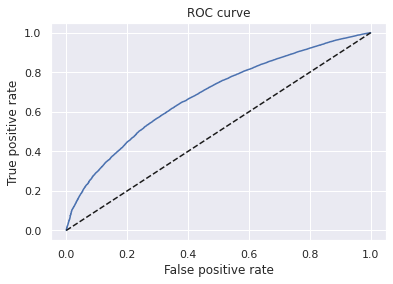

In [40]:
# Plotting the ROC curve herein
# false positive rate along the x-axis and the true positive rate along the y-axis,
plt.plot(fpr, tpr)
# Plotting a diagonal line, with dashed line style and black color.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# relabeling the axes
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [41]:
# Calculating AUROC from a set of actual values and their predicted probabilities.
AUROC = roc_auc_score(df_actual_predicted_probs['targets_test'],\
                      df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.6841181865223323

So, we found 0.68. It is above 0.50 so it shows a better performance of 1:1 line, a dummy model of probability of 0.50

## c Gini coefficient

Gini Index, aka Gini impurity, calculates the amount of probability of a specific feature that is classified incorrectly when randomly selected.

Gini index varies between values 0 and 1.  
Gini index of 0 =  the purity of classification. Each element belongs to a specified class or only one class exists there.  
Gini index of 1 = the random distribution of elements across various classes. 

The value of 0.5 of the Gini Index shows an equal distribution of elements over some classes.


In [42]:
#sorting proba values and resetting index
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
# calculating cumulative pop, good and bad
df_actual_predicted_probs['Cum N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cum N Good'] = df_actual_predicted_probs['targets_test'].cumsum()
df_actual_predicted_probs['Cum N Bad'] = df_actual_predicted_probs['Cum N Population']\
                                        - df_actual_predicted_probs['Cum N Good']
# Calculating the cumulative percentage of all, good, and bad observations.
sum_all= df_actual_predicted_probs.shape[0]
df_actual_predicted_probs['Cum Perc Population'] = df_actual_predicted_probs['Cum N Population'] / sum_all
# Calculating cumulative percentage of 'good'.
sum_good=  df_actual_predicted_probs['targets_test'].sum()
df_actual_predicted_probs['Cum Perc Good'] = df_actual_predicted_probs['Cum N Good'] /sum_good
# Calculating the cumulative percentage of 'bad'.
sum_bad = sum_all- sum_good
df_actual_predicted_probs['Cum Perc Bad'] = df_actual_predicted_probs['Cum N Bad'] / sum_bad


In [43]:
df_actual_predicted_probs.tail()

,index,targets_test,y_hat_test_proba,y_hat_test,Cum N Population,Cum N Good,Cum N Bad,Cum Perc Population,Cum Perc Good,Cum Perc Bad
93252,310589,1,0.988420,1,93253,83211,10042,0.999957,0.999952,1.0
93253,416618,1,0.988704,1,93254,83212,10042,0.999968,0.999964,1.0
93254,332098,1,0.989045,1,93255,83213,10042,0.999979,0.999976,1.0
93255,312703,1,0.989703,1,93256,83214,10042,0.999989,0.999988,1.0
93256,42098,1,0.989976,1,93257,83215,10042,1.000000,1.000000,1.0


In [44]:
df_actual_predicted_probs.head()

,index,targets_test,y_hat_test_proba,y_hat_test,Cum N Population,Cum N Good,Cum N Bad,Cum Perc Population,Cum Perc Good,Cum Perc Bad
0,79004,1,0.517020,0,1,1,0,0.000011,0.000012,0.0
1,118702,1,0.532938,0,2,2,0,0.000021,0.000024,0.0
2,107466,1,0.538366,0,3,3,0,0.000032,0.000036,0.0
3,465157,1,0.554629,0,4,4,0,0.000043,0.000048,0.0
4,352964,1,0.559462,0,5,5,0,0.000054,0.000060,0.0


Text(0.5, 1.0, 'Gini')

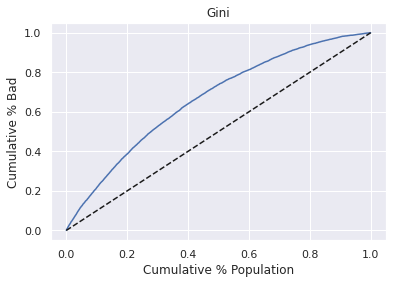

In [45]:
# Plotting Gini - cumulative percentage versus the cumulative percentage 'good' along the y-axis
plt.plot(df_actual_predicted_probs['Cum Perc Population'], df_actual_predicted_probs['Cum Perc Bad'])
# Plotting a seconary diagonal line, with dashed line style and black color.
plt.plot(df_actual_predicted_probs['Cum Perc Population'], df_actual_predicted_probs['Cum Perc Population'], linestyle = '--', color = 'k')
# Relabelling 
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [46]:
# Here we calculate Gini from AUROC.
Gini = AUROC * 2 - 1
Gini

0.3682363730446645

The Gini coefficient is a ratio showing that

*  how close our model to be a “perfect model" (a Gini coef of 1)
*  how far our model to be from being a “random model” (a Gini coefficient of 0)

The GINI score of 0.37 shows that it can be improved by better building the PD model. For this example, we keep the model as it is. 

## d Kolmogorov-Smirnov coefficient

Kolomogrov-Smirnov (KS) coefficient evaluates the separation between class distributions.

KS statistics for two samples is simply the greatest distance between two cumulative distribution functions of the positive and negative class distributions. Similar to Gini coefficient, we can have another metric to evaluate classifiers.

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

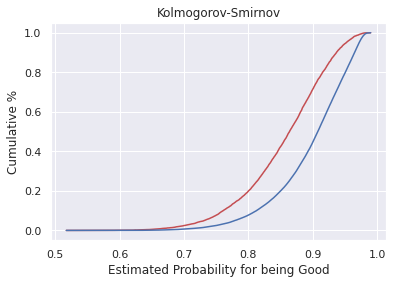

In [47]:
# Plotting KS 
# 1 predicted (estimated) probabilities versus the cumulative percentage 'bad' along the y-axis,
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cum Perc Bad'], color = 'r')
# 2 predicted (estimated) probabilities versus the cumulative percentage 'good' along the y-axis,
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cum Perc Good'], color = 'b')
# relabelling
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [48]:
# Calculating KS from the data. 
# Max difference between the cumulative percentage of 'bad' and 'good'
KS = max(df_actual_predicted_probs['Cum Perc Bad'] - df_actual_predicted_probs['Cum Perc Good'])
KS

0.27050593719201566

# 4 Applying PD model for decision making


## a Creating scorecard

calculating credit worthiness - credit scores based on our PD model



In [49]:
df_ref_categories = pd.DataFrame(ref_categories,columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan

df_scorecard = pd.concat ([summary_table, df_ref_categories ])
df_scorecard = df_scorecard.reset_index()

df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,1.550161,NaN,Intercept
1,1,grade:A,0.166340,6.007744e-02,grade
2,2,grade:B,0.317997,8.154048e-08,grade
3,3,grade:C,0.307956,3.429223e-08,grade
4,4,grade:D,0.291457,6.052307e-08,grade


In [50]:
#let's say we fix minimum score of 300 and max score of 850
min_score = 300
max_score = 850

In [51]:
#determining the ratio to multiply with the coefficients so that 
# min_score is equal to 300 and max_score is equal to 850
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
ratio_ = (max_score-min_score) / (max_sum_coef - min_sum_coef)
#calculating scores from coefs
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * ratio_
#replacing intercept coef
df_scorecard['Score - Calculation'][0] = (df_scorecard['Coefficients'][0] -\
                                           min_sum_coef)*ratio_+ min_score
#rounding the scores to integer like
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard.head()

<ipython-input-51-3325ce0310d8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = (df_scorecard['Coefficients'][0] -\


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,1.550161,NaN,Intercept,441.670697,442.0
1,1,grade:A,0.166340,6.007744e-02,grade,12.757548,13.0
2,2,grade:B,0.317997,8.154048e-08,grade,24.389000,24.0
3,3,grade:C,0.307956,3.429223e-08,grade,23.618837,24.0
4,4,grade:D,0.291457,6.052307e-08,grade,22.353437,22.0


In [52]:
#let's check if we have min score of 300 and max score of 800
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
#let's check if we have min score of 300 and max score of 800
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
print(min_sum_score_prel, max_sum_score_prel)

300.0 849.0


Max score is 849. We need to alter and increase one of the scores by 1 pt. Let's print out the values rounded.

In [53]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
#let's check which index value to increase
df_scorecard['Difference'] =  df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
#let's print out the max scores of each feature
df_scorecard.loc[df_scorecard.groupby(['Original feature name'])['Score - Final'].idxmax()]

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Score - Final,Difference
0,0,Intercept,1.550161,NaN,Intercept,441.670697,442.0,442.0,0.329303
44,44,acc_now_delinq:>=1,0.166130,7.406251e-02,acc_now_delinq,12.741471,13.0,13.0,0.258529
21,21,addr_state:WV_NH_WY_DC_ME_ID,0.501595,4.592912e-21,addr_state,38.470102,38.0,38.0,-0.470102
61,61,annual_inc:120K-140K,0.517780,1.838384e-22,annual_inc,39.711436,40.0,40.0,0.288564
65,65,dti:3.5-7.7,0.019309,7.574631e-01,dti,1.480878,1.0,1.0,-0.480878
34,34,emp_length:10,0.117146,1.866244e-10,emp_length,8.984561,9.0,9.0,0.015439
2,2,grade:B,0.317997,8.154048e-08,grade,24.389000,24.0,24.0,-0.389000
7,7,home_ownership:OWN,0.123187,9.007721e-10,home_ownership,9.447892,9.0,9.0,-0.447892
28,28,initial_list_status:w,0.271357,2.700122e-112,initial_list_status,20.811927,21.0,21.0,0.188073
81,9,inq_last_6mths:>6,0.000000,NaN,inq_last_6mths,0.000000,0.0,0.0,0.000000


In [54]:
#increasing the rounded score of some features 1+ to have max score of 850 at the end
df_scorecard['Score - Final'][21]  = 39 #coef will be adjusted one pt higher

<ipython-input-54-f35d598d3ff7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][21]  = 39 #coef will be adjusted one pt higher


In [55]:
#let's check if we have min score of 300 and max score of 800
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

300.0

In [56]:
#let's check if we have min score of 300 and max score of 800
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

850.0

**We finally have a min score of 300 and a max score of 850.**

Score card is ready!!! Let's Export It

In [57]:
inputs_test_ref_categories.to_csv('../data/inputs_train_with_ref_categories.csv')

In [58]:
df_scorecard.to_csv('../data/df_scorecard.csv')

##b Calculating Credit Scores

In [59]:
inputs_test_ref_categories.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35
362514,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
213591,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [60]:
# test dataset with reference categories
inputs_test_with_ref_cat_w_intercept = inputs_train.loc[: , features_all]
# inserting the intercept point w an index of 0, that is, in the beginning of df
# The name of that column is 'Intercept', and its values are 1s.
inputs_test_with_ref_cat_w_intercept.insert(0,'Intercept', 1)
# ensuring that we selected the same features used in scorecard 
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept [df_scorecard['Feature name'].values]

inputs_test_with_ref_cat_w_intercept.shape

(373028, 87)

In [61]:
#creating the score card array
scorecard_scores = df_scorecard['Score - Final']
scorecard_scores.shape

(87,)

In [62]:
#from list to an array
scorecard_scores = scorecard_scores.values.reshape(87,1)
# multiplying the values of each row of the dataframe by the values of each column of the variable,
# with 'dot' method (sum of the products)
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [63]:
y_scores.head()

,0
427211,580.0
206088,513.0
136020,572.0
412305,422.0
36159,451.0


##c From Credit Score to Probability of Default



In [64]:
# Dividing the difference b/w the scores and the minimum score by diff b/w max and min score.
# Multiplying by the diff b/w max sum of coefs and min sum of coefs.
# Adding minimum sum of coefs.
coef_ =   (max_sum_coef - min_sum_coef) / (max_score - min_score) 
sum_coef_from_score = (y_scores - min_score) * coef_ + min_sum_coef
# dividing an exponent raised to sum of coefs from score by
# an exponent raised to sum of coefs from score plus one.
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
427211,0.966228
206088,0.922742
136020,0.962654
412305,0.784770
36159,0.841816


##d Setting CutOffs

In [65]:
# Getting ROC Curve and their predicted probabilities.
# It returns us the false positive rates, the true positive rates, and the thresholds.
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['targets_test'],\
          df_actual_predicted_probs['y_hat_test_proba'])
# Conconating 3 dataframes along the columns.
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
# Naming the columns of the dataframe 'thresholds', 'fpr', and 'tpr'.
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [66]:
# Let the 1st threshold (the value of the thresholds column with index 0) be equal 
# very close to 1 but smaller than 1
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 20)

# The score corresponding to each threshold equals:
ratio_ = (max_score-min_score) / (max_sum_coef - min_sum_coef)
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ratio_ + min_score).round()
df_cutoffs['Score'][0] = max_score

In [67]:
# defining a function called 'n_approved' which assigns a value of 1 if a predicted probability
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

# With the assumption that a given probability of being 'good' will be approved,
# we obtain # of approved applications.
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)

# Calculating # of rejected applications for each threshold.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']

# Approval rate = the ratio of the apprv'd apps and all apps.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]

# Rejection rate.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [68]:
# displaying the df with cutoffs form l/ w ind 5600 to l/ w ind 5650.
df_cutoffs.iloc[5600: 5650, ]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5600,0.904133,0.260705,0.526612,495.0,46440,46817,0.497979,0.502021
5601,0.904132,0.260705,0.526624,495.0,46441,46816,0.497989,0.502011
5602,0.904124,0.260904,0.526624,495.0,46443,46814,0.498011,0.501989
5603,0.904113,0.260904,0.526708,495.0,46450,46807,0.498086,0.501914
5604,0.904111,0.261004,0.526708,495.0,46451,46806,0.498097,0.501903
5605,0.904104,0.261004,0.526732,495.0,46453,46804,0.498118,0.501882
5606,0.904102,0.261103,0.526732,495.0,46454,46803,0.498129,0.501871
5607,0.904096,0.261103,0.526780,495.0,46458,46799,0.498172,0.501828
5608,0.904096,0.261203,0.526780,495.0,46459,46798,0.498182,0.501818
5609,0.904088,0.261203,0.526840,495.0,46464,46793,0.498236,0.501764


If the cutoff score is 495, half of the applications will be accepted for credit.

In [69]:
df_cutoffs.iloc[1000: 2000, ]
# Here we display the dataframe with cutoffs form line with index 1000 to line with index 2000.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.955653,0.040131,0.164826,558.0,14119,79138,0.151399,0.848601
1001,0.955651,0.040231,0.164826,558.0,14120,79137,0.151410,0.848590
1002,0.955646,0.040231,0.164910,558.0,14127,79130,0.151485,0.848515
1003,0.955645,0.040331,0.164910,558.0,14128,79129,0.151495,0.848505
1004,0.955596,0.040331,0.165283,558.0,14159,79098,0.151828,0.848172
...,...,...,...,...,...,...,...,...
1995,0.940422,0.085242,0.269110,534.0,23250,70007,0.249311,0.750689
1996,0.940421,0.085342,0.269110,534.0,23251,70006,0.249322,0.750678
1997,0.940395,0.085342,0.269254,534.0,23263,69994,0.249450,0.750550
1998,0.940394,0.085342,0.269278,534.0,23265,69992,0.249472,0.750528


If the cutoff score is 558, only about 15% of the applications will be accepted for credit.

--- END OF NOTEBOOK ---  
#END